# __Assignment 1 - CBD3334 - Data Mining and Analysis__

## __Team Members__:

- 1) Aanal Patel - C0910376
- 2) Bimal Shresta - C0919385
- 3) Danilo Diaz - C0889539
- 4) Ernie Sumoso - C0881591
- 5) Jayachandhran Saravanan - C0910392

## __1 & 2. Collecting, Saving Data, and basic Exploratory Data Analysis (EDA)__

Let's start by __collecting the data from the given CSV files__.

For starters, we will __save the file names into a list__ so that we can later loop through them.

For that we will need to __import some functions from the os library__.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/NILodio/data-mining/master/init.py
import init; init.init(force_download=False);

replicating local resources


In [2]:
from os import listdir
from os.path import isfile, join

# get the list of file names from the data path
data_path = 'local'
files = [file for file in listdir(data_path) if isfile(join(data_path, file))]
files

['APPL.csv',
 'altcoin.csv',
 'GOOG.csv',
 'bitcoin.csv',
 'Cryptocurrency.csv',
 'Gold.csv',
 'YHOO.csv',
 'coindesk.csv']

Now that we have the file names, let's __read these CSV files and save them as Pandas Dataframes__.

We will also __display a sample row from each dataframe__, just to have some initial visualization of our available data.

We will __save all dataframes inside one list.__

In [3]:
import pandas as pd

# function to read multiple csv files from a path into a list of dataframes
def read_csvs_from_path(data_path : str):
    # get list of file names
    files = [file for file in listdir(data_path) if isfile(join(data_path, file))]
    dfs = []

    # loop through files, read the csv file and save the dataframe
    for i, file in enumerate(files):
        df = pd.read_csv(data_path + "/" + file)

        #label the data to make exploration after concatenation easier
        df['tag'] = str(file)[:-4]

        print(str(i+1) + ". Sample data extracted from: '" + file + "'")
        display(df.tail(1))
        dfs.append(df)

    # return the list of dataframes
    return dfs

dfs = read_csvs_from_path(data_path)

1. Sample data extracted from: 'APPL.csv'


,Datetime,Tweet Id,Text,URL,User,tag
3180,2023-03-05 00:03:31+00:00,1632169937350303744,Apple’s Approval Process Delays Uniswap’s Mobi...,https://twitter.com/ZhotCrypto/status/16321699...,https://twitter.com/ZhotCrypto,APPL


2. Sample data extracted from: 'altcoin.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-09 19:03:33+00:00,1633906384160034817,🔔 Public Company Accounting Oversight Board (P...,https://twitter.com/Altcoin_Alerts/status/1633...,https://twitter.com/Altcoin_Alerts,altcoin


3. Sample data extracted from: 'GOOG.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-05 12:01:20+00:00,1632350581569490946,Get instant updates and free trials join here ...,https://twitter.com/Smith28301/status/16323505...,https://twitter.com/Smith28301,GOOG


4. Sample data extracted from: 'bitcoin.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-10 22:03:06+00:00,1634313959904886786,@JulesXavier9 Obama didn’t take office until 2...,https://twitter.com/btc_liberates/status/16343...,https://twitter.com/btc_liberates,bitcoin


5. Sample data extracted from: 'Cryptocurrency.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-10 14:44:37+00:00,1634203611403022336,Silvergate and Cryptocurrency😣😣,https://twitter.com/tamoinam/status/1634203611...,https://twitter.com/tamoinam,Cryptocurrency


6. Sample data extracted from: 'Gold.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-10 22:37:01+00:00,1634322493056905217,Check out Vintage Bracelet Gold Tone Pink Ston...,https://twitter.com/ShopThar/status/1634322493...,https://twitter.com/ShopThar,Gold


7. Sample data extracted from: 'YHOO.csv'


,Datetime,Tweet Id,Text,URL,User,tag
3643,2023-03-05 00:00:48+00:00,1632169253079072768,@NguboAyimbathwa @ChristoThurston @ThuliMadons...,https://twitter.com/Bright_Afrika/status/16321...,https://twitter.com/Bright_Afrika,YHOO


8. Sample data extracted from: 'coindesk.csv'


,Datetime,Tweet Id,Text,URL,User,tag
5000,2023-03-06 04:06:30+00:00,1632593471042142213,@milkyway16eth source coindesk - Arca’s Hotz ...,https://twitter.com/hashtronaut207/status/1632...,https://twitter.com/hashtronaut207,coindesk


As we can see all of __our data has the same columns and around 3k - 5k rows.__

Let's __implement a class to perform an Exploratory Data Analysis__ on these datasets.

This class will be in charge of __displaying the shape (number of rows and columns) and column names of the datasets.__

But first, we will need a couple of functions to verify our method parameters and to print lines.

In [4]:
# function to verify a parameter type
def verify_parameter(param, param_name, type_):
    if not isinstance(param, type_):
        raise ValueError("Parameter '" + param_name + "' must be a " + str(type_))

In [5]:
# function to print a simple line of chars
def print_lines(line:str = '-', n:int = 40):
    # verify parameters type
    verify_parameter(line, 'line', str)
    verify_parameter(n, 'n', int)

    # print the line
    print(line * n)

In [6]:
class EDA:
    def display_shape_and_colnames_df(self, df:pd.DataFrame, return_shape:bool = True):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)
        verify_parameter(return_shape, 'return_shape', bool)

        # display dataframe shape and column names
        print("Dataframe Rows:", df.shape[0])
        print("Dataframe Columns:", df.shape[1])
        print("Column names:", df.columns.to_list())

        # return the shape if needed
        if return_shape: return df.shape

    def display_shape_and_colnames_dfs(self, dfs:list, names:list):
        # verify parameters type
        verify_parameter(dfs, 'dfs', list)
        verify_parameter(names, 'names', list)
        assert len(names) == len(dfs), "'dfs' and 'names' must have same length"

        # display
        total_rows = 0
        for i, df in enumerate(dfs):
            print_lines()
            print("Dataframe from file:", names[i])
            df_shape = self.display_shape_and_colnames_df(df)
            total_rows += df_shape[0]
        print_lines(line='=')
        print("TOTAL ROWS:", total_rows)

eda = EDA()
eda.display_shape_and_colnames_dfs(dfs, files)

----------------------------------------
Dataframe from file: APPL.csv
Dataframe Rows: 3181
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']
----------------------------------------
Dataframe from file: altcoin.csv
Dataframe Rows: 5001
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']
----------------------------------------
Dataframe from file: GOOG.csv
Dataframe Rows: 5001
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']
----------------------------------------
Dataframe from file: bitcoin.csv
Dataframe Rows: 5001
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']
----------------------------------------
Dataframe from file: Cryptocurrency.csv
Dataframe Rows: 5001
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']
----------------------------------------
Dataframe from file: Gold.csv
Dat

Once again we find that our datasets have the same columns, and around 3k to 5k rows.

Let's __describe these columns__:
- __Datetime__: date and time of the posted tweet
- __Tweet ID__: unique identifier of the posted tweet
- __Text__: raw text data from the tweet (needs further cleaning)
- __URL__: link from the internet to the posted tweet
- __User__: username owner of the tweet

Also, in __total (from all datasets) we have around 36.8k rows.__

As our datasets are very similar we can __perform a concatenate as the next step.__

In [7]:
# applying a vertical concat on all our datasets
df = pd.concat(dfs, axis=0).reset_index(drop=True)
df.tail()

,Datetime,Tweet Id,Text,URL,User,tag
36826,2023-03-06 04:17:24+00:00,1632596213588455425,RT @missmayad: Excited for Consensus. Always i...,https://twitter.com/varggasllosa/status/163259...,https://twitter.com/varggasllosa,coindesk
36827,2023-03-06 04:16:06+00:00,1632595887057932289,@AndrewDARMACAP @BillHughesDC Yes - but @CoinD...,https://twitter.com/MattCorva/status/163259588...,https://twitter.com/MattCorva,coindesk
36828,2023-03-06 04:12:35+00:00,1632595004299386882,由CoinDesk策划，是加密货币和Web3领域最大的年度活动之一Consensus大会，似...,https://twitter.com/xl941228/status/1632595004...,https://twitter.com/xl941228,coindesk
36829,2023-03-06 04:11:47+00:00,1632594802242977792,@ahmad_alfalasi @CoinDesk do u think binance c...,https://twitter.com/buridangripto1/status/1632...,https://twitter.com/buridangripto1,coindesk
36830,2023-03-06 04:06:30+00:00,1632593471042142213,@milkyway16eth source coindesk - Arca’s Hotz ...,https://twitter.com/hashtronaut207/status/1632...,https://twitter.com/hashtronaut207,coindesk


Now we have one __single dataset that contains all data from our 8 different file sources__.

Let's display its shape and column names.

Let's also __implement a second class in class of further exploratory data analysis__ with tasks like:

- __checking missing values__
- __checking duplicated rows__
- __checking unique values per column__

In [8]:
eda.display_shape_and_colnames_df(df, return_shape=False)

Dataframe Rows: 36831
Dataframe Columns: 6
Column names: ['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'tag']


In [9]:
class EDA2():
    def check_missing_values_df(self, df : pd.DataFrame):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)

        # display missing values per column
        print_lines(n=30, line='=')
        print("# Missing values per column:")
        display(df.isna().sum())
        print_lines(n=30)
        print("% Missing values per column:")
        display(df.isna().mean() * 100)
        print_lines(n=30, line='=')

    def check_duplicated_rows_df(self, df : pd.DataFrame):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)

        # display duplicates from the dataset
        print_lines(n=30, line='=')
        print("# Duplicated rows:", df.duplicated().sum())
        print_lines(n=30)
        print("% Duplicated rows:", round(df.duplicated().mean() * 100, 2))
        print_lines(n=30, line='=')

    def check_unique_values_df(self,df : pd.DataFrame):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)

        # display unique values per column
        print_lines(n=30, line='=')
        print("# Unique values per column:")
        display(df.nunique())
        print_lines(n=30)
        print("% Unique values per column (relative to total rows):")
        display(round(df.nunique()*100 / df.shape[0], 2))
        print_lines(n=30, line='=')

eda = EDA2()
eda.check_missing_values_df(df)
eda.check_duplicated_rows_df(df)
eda.check_unique_values_df(df)

# Missing values per column:


Datetime    0
Tweet Id    0
Text        0
URL         0
User        0
tag         0
dtype: int64

------------------------------
% Missing values per column:


Datetime    0.0
Tweet Id    0.0
Text        0.0
URL         0.0
User        0.0
tag         0.0
dtype: float64

# Duplicated rows: 0
------------------------------
% Duplicated rows: 0.0
# Unique values per column:


Datetime    29029
Tweet Id    36371
Text        35661
URL         36371
User        18564
tag             8
dtype: int64

------------------------------
% Unique values per column (relative to total rows):


Datetime    78.82
Tweet Id    98.75
Text        96.82
URL         98.75
User        50.40
tag          0.02
dtype: float64

As we explore our final dataset we __gained the following insights__:
- Fortunately there are __no missing values within any of the columns__.
- The dataset contains __460 duplicated rows, which represents 1.25%__ of the entire data.
- We have a very __elevated number of unique values per column__, which is expected as we are dealing with different tweets from users on various dates.

Let's proceed with the data cleaning step.

## __3. Cleaning Data__

On this step we will __focus on cleaning the 'Text' column__, as it contains the __most valuable textual data from our dataset__.

Let's start by __implementing a class__ in charge of __removing duplicates__.

These __duplicated rows only represented 1.25% of the total rows__; deleting them will benefit our analysis as we are __eliminating redundant data__ probably wrongly measured from the real world.

Our class will be also in charge of the following tasks:
- __removing duplicated rows__
- __removing punctuations from the text__
- __removing numbers from the text__

In [10]:
import string
import re

class CleanData():

    def remove_duplicates_df(self, df : pd.DataFrame, reset_index : bool = True):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)
        verify_parameter(reset_index, 'reset_index', bool)

        # perform the duplicate removal on a copy of the dataframe
        df_copy = df.copy()

        # check duplicates before and after removal
        eda = EDA2()
        print("Before Removal:")
        eda.check_duplicated_rows_df(df_copy)

        # actually remove the duplicates and reset index if specified
        df_copy.drop_duplicates(inplace=True)
        if reset_index: df_copy.reset_index(drop=True, inplace=True)

        # check duplicates before and after removal
        print("After Removal:")
        eda.check_duplicated_rows_df(df_copy)

        return df_copy


    def remove_punctuation_string(self, text : str):
        # verify parameters type
        verify_parameter(text, 'text', str)

        # return the string value but without punctuation
        return text.translate(str.maketrans('', '', string.punctuation))

    def remove_numbers_string(self, text : str):
        # verify parameters type
        verify_parameter(text, 'text', str)

        # return the string value but without numbers
        return re.sub(r'\d+', '', text)

cd = CleanData()

In [11]:
# remove duplicates
df = cd.remove_duplicates_df(df)
# remove punctuation in Text column
df['Text'] = df['Text'].apply(cd.remove_punctuation_string)
# remove numbers in Text column
df['Text'] = df['Text'].apply(cd.remove_numbers_string)

Before Removal:
# Duplicated rows: 0
------------------------------
% Duplicated rows: 0.0
After Removal:
# Duplicated rows: 0
------------------------------
% Duplicated rows: 0.0


In [12]:
df.tail()

,Datetime,Tweet Id,Text,URL,User,tag
36826,2023-03-06 04:17:24+00:00,1632596213588455425,RT missmayad Excited for Consensus Always impr...,https://twitter.com/varggasllosa/status/163259...,https://twitter.com/varggasllosa,coindesk
36827,2023-03-06 04:16:06+00:00,1632595887057932289,AndrewDARMACAP BillHughesDC Yes but CoinDesk ...,https://twitter.com/MattCorva/status/163259588...,https://twitter.com/MattCorva,coindesk
36828,2023-03-06 04:12:35+00:00,1632595004299386882,由CoinDesk策划，是加密货币和Web领域最大的年度活动之一Consensus大会，似乎...,https://twitter.com/xl941228/status/1632595004...,https://twitter.com/xl941228,coindesk
36829,2023-03-06 04:11:47+00:00,1632594802242977792,ahmadalfalasi CoinDesk do u think binance can ...,https://twitter.com/buridangripto1/status/1632...,https://twitter.com/buridangripto1,coindesk
36830,2023-03-06 04:06:30+00:00,1632593471042142213,milkywayeth source coindesk Arca’s Hotz said...,https://twitter.com/hashtronaut207/status/1632...,https://twitter.com/hashtronaut207,coindesk


After performing the previously described cleaning steps we notice that our text column does not contain punctuation or numbers now, and we have also removed duplicated rows.

Now the number of __remaining rows on our dataset is around 36.3k.__

However, we __still have some non-relevant words and characters within our text column.__

For example: words of length 1 like emojis or other single character strings.

Let's __implement a second cleaning class__ that will be in charge of:
- __identifying words of length "n"__ (number defined as parameter) within the column 'Text'
- __removing these n-length words from the column 'Text'__
- __removing non alphabetic characters from the column 'Text'__

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk import word_tokenize

class CleanData2():

    def get_words_len_n(self, df : pd.DataFrame, col : str, n : int, display : bool = False, return_list : bool = True):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)
        verify_parameter(col, 'col', str)
        verify_parameter(n, 'n', int)
        verify_parameter(display, 'display', bool)
        verify_parameter(return_list, 'return_list', bool)

        # initialize list of words of len n
        words = []

        # loop through unique values of the specified column
        for unique in df[col].unique():

            # get unique words len n from tokens of unique
            words += [word for word in word_tokenize(unique) if len(word) == n]

        # sort and delete repeated values in the list
        words = sorted(list(set(words)))

        if display:
            print("Words of length", n, "from column '" + col + "'")
            print(words)
        if return_list: return words

    def remove_words_df_col(self, df : pd.DataFrame, col : str, words : list):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)
        verify_parameter(col, 'col', str)
        verify_parameter(words, 'words', list)

        # perform removal on a copy of the dataframe
        df_copy = df.copy()

        # loop through unique values of the column
        for unique in df[col].unique():
            # tokenize the unique value from the column
            tokens = word_tokenize(unique)

            # remove the words from the tokens
            tokens = [token for token in tokens if token not in words]

            # replace the new value in the df column
            df_copy[col].replace(unique, ' '.join(tokens), inplace=True)

        return df_copy

    def remove_chars_df_col(self, df : pd.DataFrame, col : str, chars : list):
        # verify parameters type
        verify_parameter(df, 'df', pd.DataFrame)
        verify_parameter(col, 'col', str)
        verify_parameter(chars, 'chars', list)

        # perform removal on a copy of the dataframe
        df_copy = df.copy()

        # remove all chars from the column values
        for char in chars:
            df_copy[col] = df_copy[col].str.replace(char, '', regex=False)

        return df_copy

cd2 = CleanData2()

In [15]:
# save and display words of length 1 from column Text
words = cd2.get_words_len_n(df, 'Text', 1, display=True)

Words of length 1 from column 'Text'
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '£', '¥', '«', '¯', '°', '±', '´', '·', '»', '¿', 'À', 'È', 'É', 'Ö', 'à', 'á', 'å', 'è', 'é', 'ñ', 'ó', 'ü', 'ý', 'ı', '̀', '̫', '͒', 'Ξ', 'ή', 'η', 'ω', 'А', 'В', 'И', 'С', 'У', 'Я', 'а', 'в', 'з', 'и', 'о', 'п', 'с', 'у', 'я', 'і', '،', '؟', 'ب', 'د', 'ع', 'ف', 'م', 'و', 'ي', '٪', 'ۗ', 'ۚ', 'आ', 'न', 'ಠ', 'ಥ', 'ඉ', 'ด', 'อ', 'ื', '฿', 'ᐟ', 'ạ', 'ở', '\u200b', '–', '—', '‘', '’', '“', '”', '„', '•', '‣', '…', '‧', '›', '‿', '\u2060', '₦', '€', '₱', '₹', '₺', '₿', '⃣', '↑', '→', '↓', '∂', '−', '√', '∠', '⊂', '⊃', '⋆', '⌘', '⍃', '⏪', '⏫', '⏬', '⏰', '⏳', '─', '│', '┐', '║', '╥', '▅', '■', '▪', '▰', '▶', '▸', '►', '◆', '●', '◔', '◾', '★', '☆', '♟', '♡', '♥', '♦', '♪', '♫', '♾', '⚒', '⚔', '⚠

We have defined n as 1, and we rapidly notice __very unusual 1-length words like emojis, and other language characters.__

Let's proceed by __removing them from our 'Text' column.__

In [16]:
# remove words of length 1 from column Text
df = cd2.remove_words_df_col(df, 'Text', words)

In [17]:
df.tail()

,Datetime,Tweet Id,Text,URL,User,tag
36826,2023-03-06 04:17:24+00:00,1632596213588455425,RT missmayad Excited for Consensus Always impr...,https://twitter.com/varggasllosa/status/163259...,https://twitter.com/varggasllosa,coindesk
36827,2023-03-06 04:16:06+00:00,1632595887057932289,AndrewDARMACAP BillHughesDC Yes but CoinDesk n...,https://twitter.com/MattCorva/status/163259588...,https://twitter.com/MattCorva,coindesk
36828,2023-03-06 04:12:35+00:00,1632595004299386882,由CoinDesk策划，是加密货币和Web领域最大的年度活动之一Consensus大会，似乎...,https://twitter.com/xl941228/status/1632595004...,https://twitter.com/xl941228,coindesk
36829,2023-03-06 04:11:47+00:00,1632594802242977792,ahmadalfalasi CoinDesk do think binance can be...,https://twitter.com/buridangripto1/status/1632...,https://twitter.com/buridangripto1,coindesk
36830,2023-03-06 04:06:30+00:00,1632593471042142213,milkywayeth source coindesk Arca Hotz said the...,https://twitter.com/hashtronaut207/status/1632...,https://twitter.com/hashtronaut207,coindesk


Event though we removed 1-length words, we still have some emojis due to these being considered words for being attached between blank spaces.

Let's actually __check the non-alphabetic characters__ now and __remove these unusual characters from our text.__

In [18]:
# get non-alphabetic characters
unique_chars = list(set(df['Text'].apply(list).sum()))
non_alphabetic_chars = [char for char in unique_chars if not char.isalpha()]
if ' ' in non_alphabetic_chars: non_alphabetic_chars.remove(' ')

# remove non-alphabetic characters from column Text
df = cd2.remove_chars_df_col(df, 'Text', non_alphabetic_chars)

In [19]:
df.tail()

,Datetime,Tweet Id,Text,URL,User,tag
36826,2023-03-06 04:17:24+00:00,1632596213588455425,RT missmayad Excited for Consensus Always impr...,https://twitter.com/varggasllosa/status/163259...,https://twitter.com/varggasllosa,coindesk
36827,2023-03-06 04:16:06+00:00,1632595887057932289,AndrewDARMACAP BillHughesDC Yes but CoinDesk n...,https://twitter.com/MattCorva/status/163259588...,https://twitter.com/MattCorva,coindesk
36828,2023-03-06 04:12:35+00:00,1632595004299386882,由CoinDesk策划是加密货币和Web领域最大的年度活动之一Consensus大会似乎活动...,https://twitter.com/xl941228/status/1632595004...,https://twitter.com/xl941228,coindesk
36829,2023-03-06 04:11:47+00:00,1632594802242977792,ahmadalfalasi CoinDesk do think binance can be...,https://twitter.com/buridangripto1/status/1632...,https://twitter.com/buridangripto1,coindesk
36830,2023-03-06 04:06:30+00:00,1632593471042142213,milkywayeth source coindesk Arca Hotz said the...,https://twitter.com/hashtronaut207/status/1632...,https://twitter.com/hashtronaut207,coindesk


Now we have a __more clean dataset__ and the goal of this section has been achieved.

Let's proceed to the data visualization.

## __4. Visualizing Data__

In [20]:
from wordcloud import WordCloud

In [21]:
df[df['tag']==1]

,Datetime,Tweet Id,Text,URL,User,tag


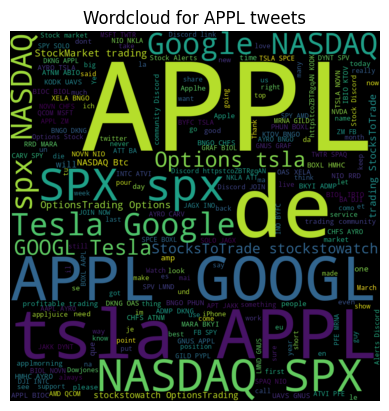

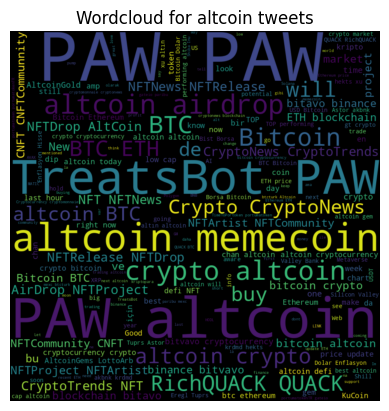

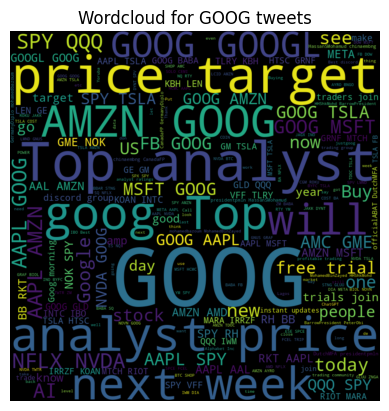

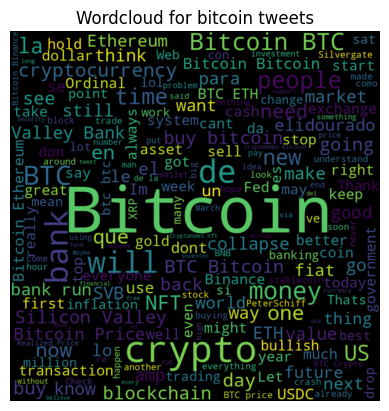

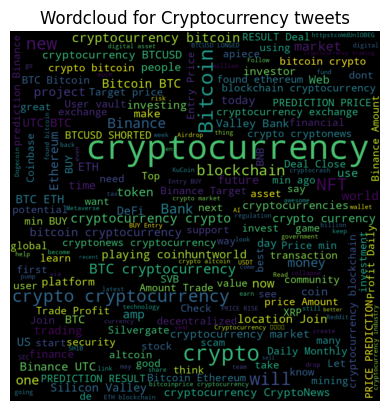

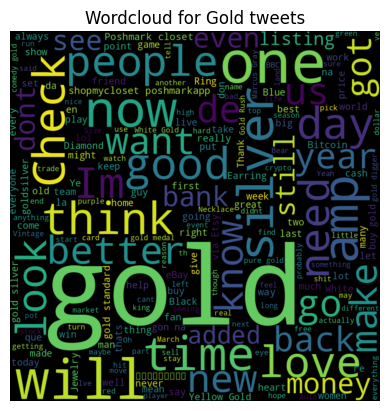

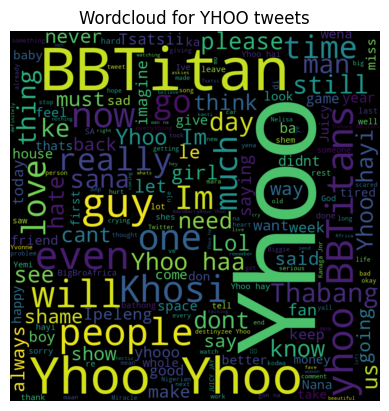

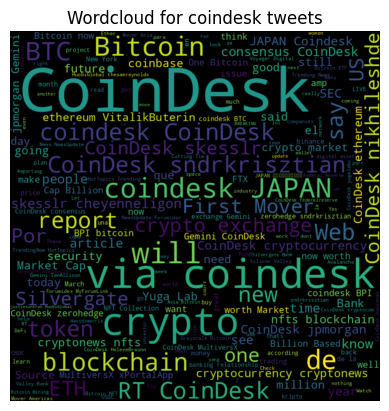

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
for tag in df['tag'].unique():
  data = df[df['tag']==tag]
  text = ' '.join(data['Text'])

  wordcloud = WordCloud(width=900, height=900, background_color='black').generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Wordcloud for {tag} tweets')
  plt.axis("off")
  plt.show()

In [23]:
df['Datetime'] = df['Datetime'].apply(pd.to_datetime)

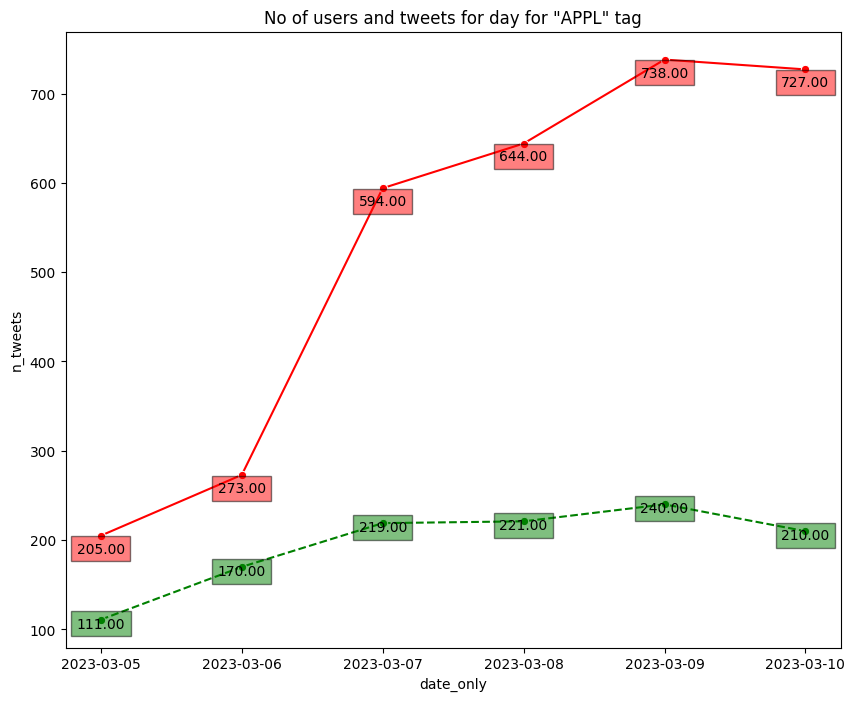

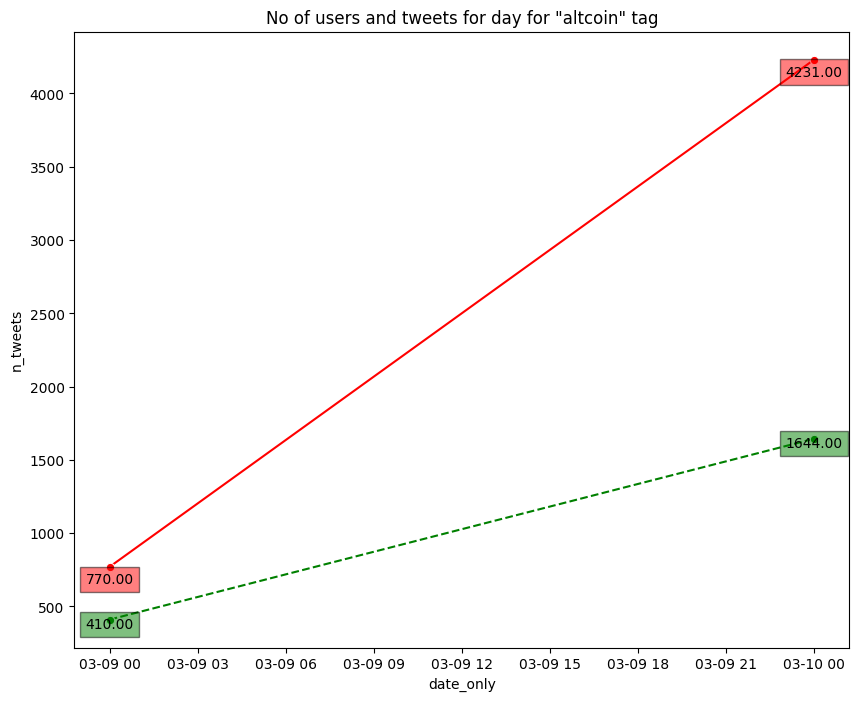

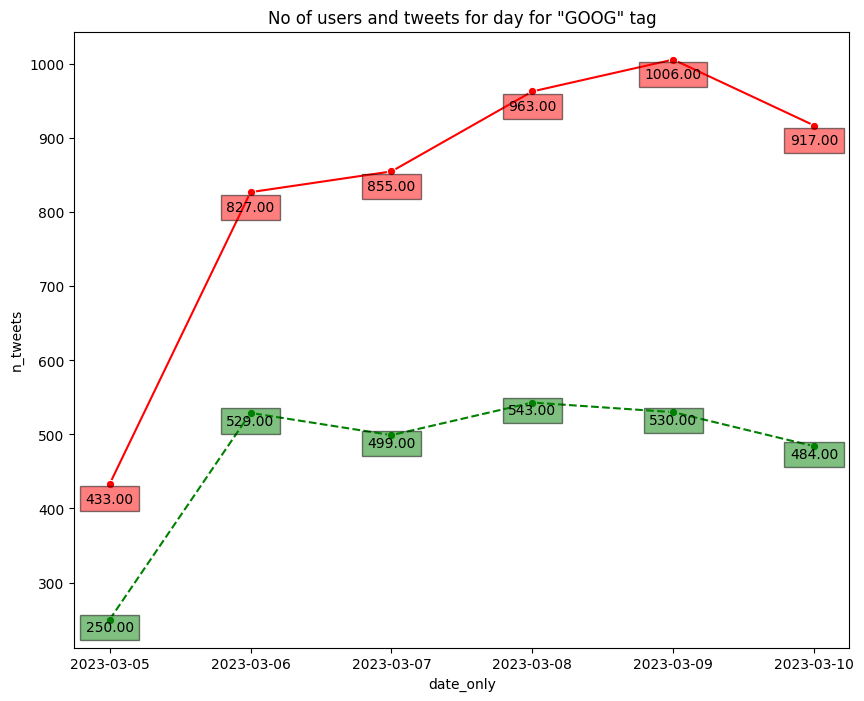

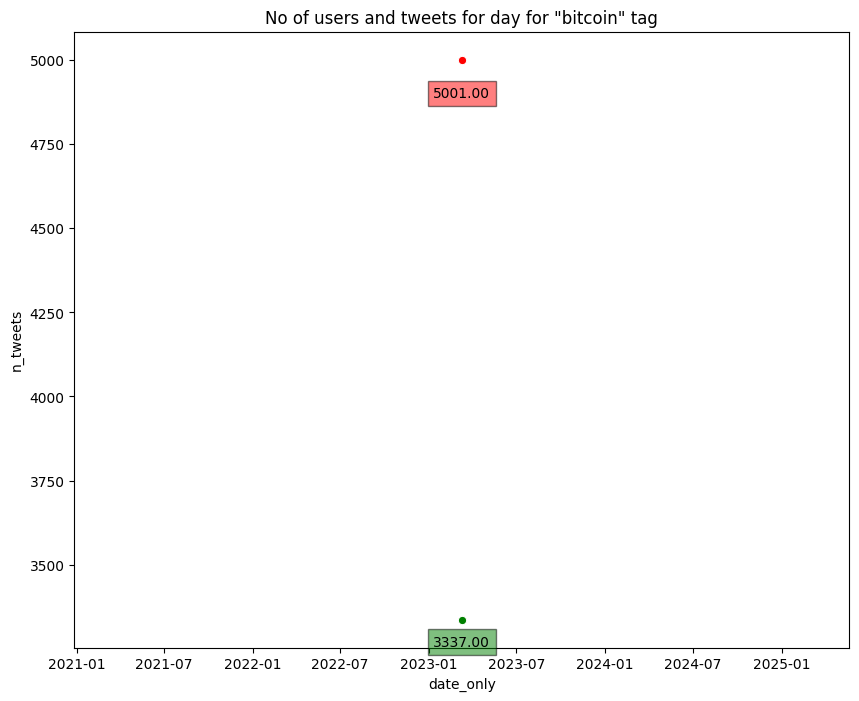

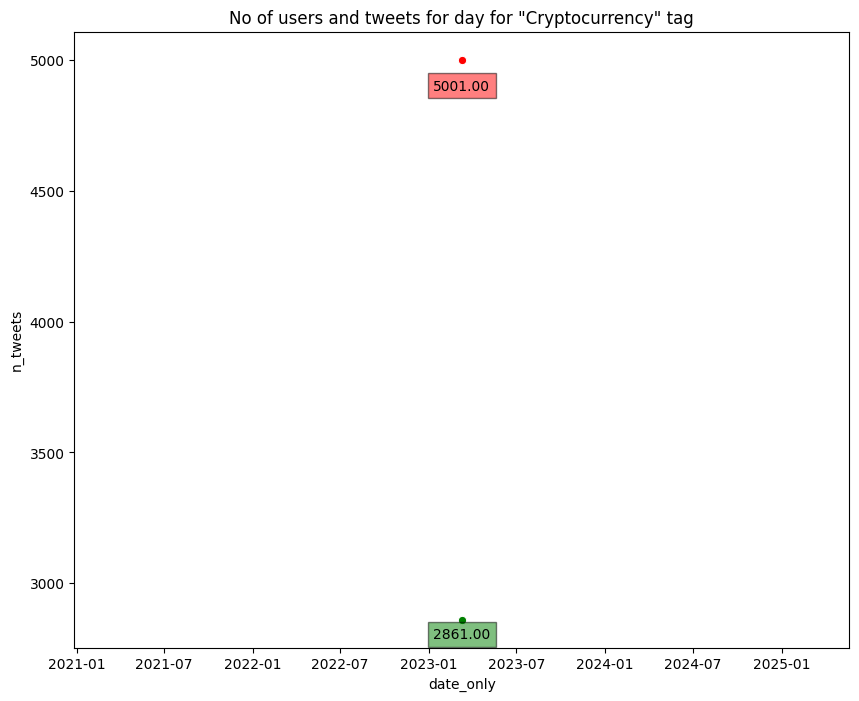

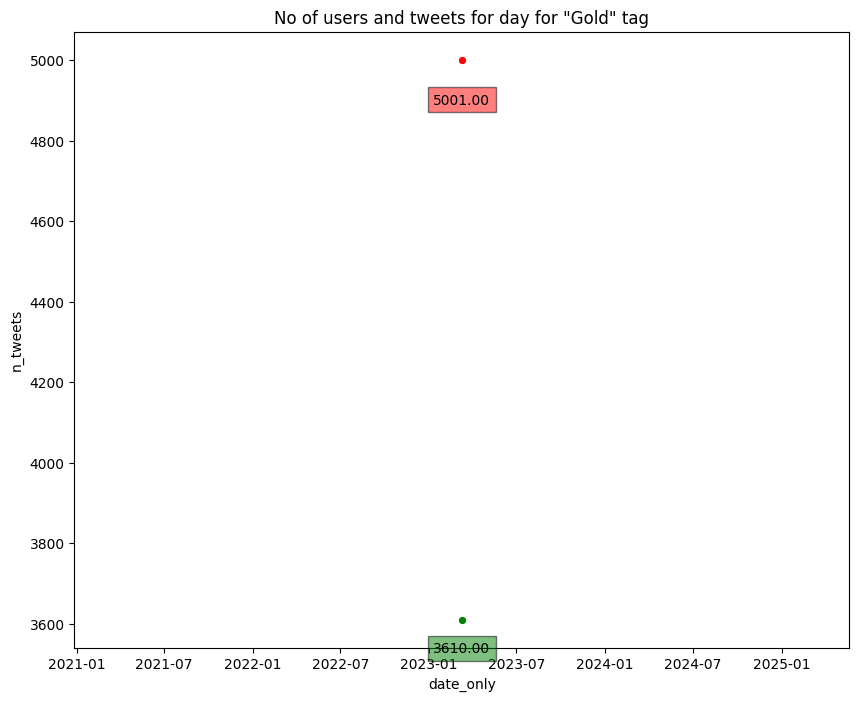

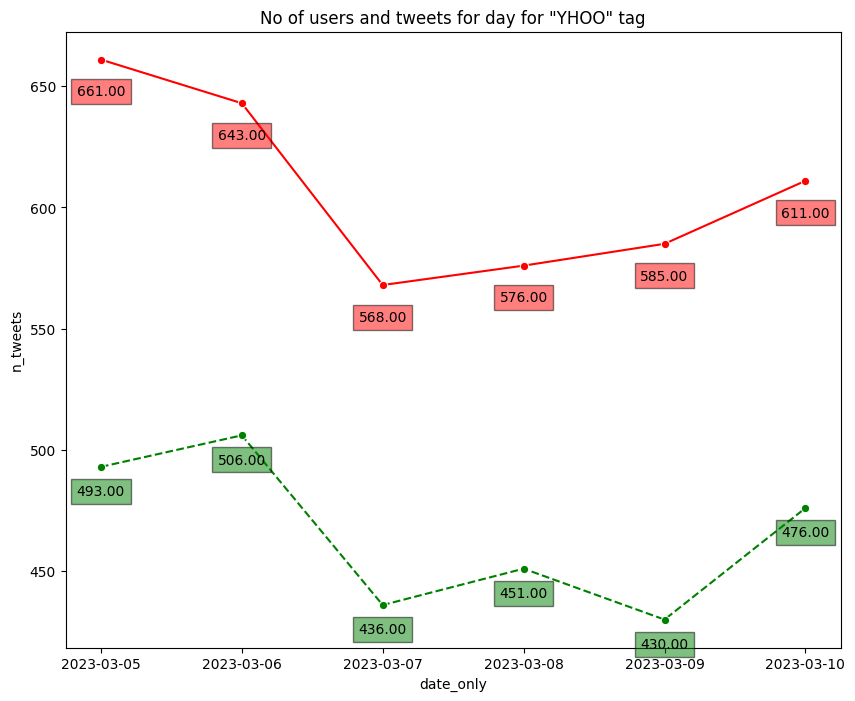

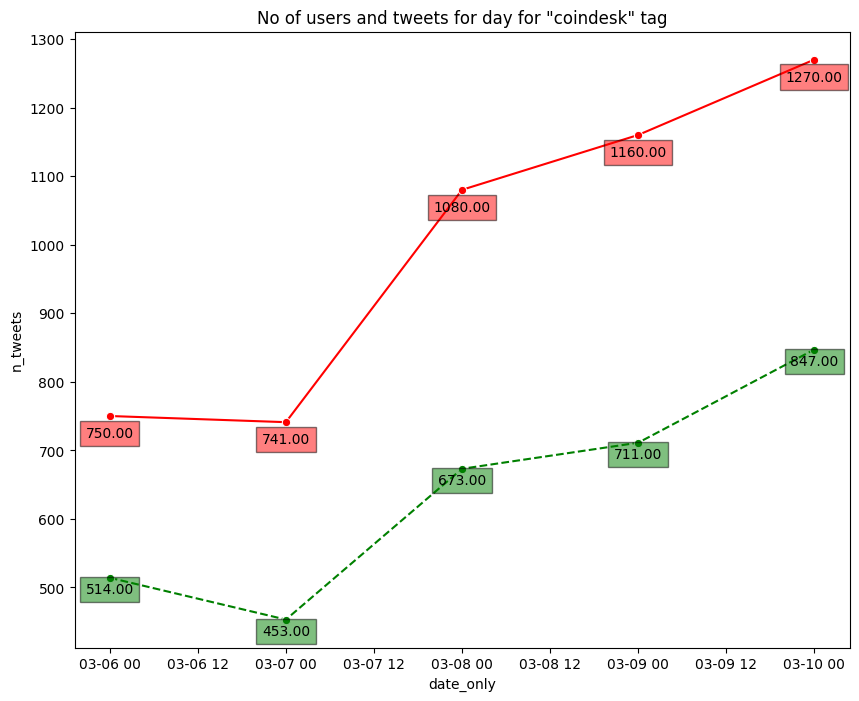

In [24]:
#create a date column just for the date so we can group per day
df['date_only'] = df['Datetime'].dt.date

# group for each tags
for tag in df['tag'].unique():
  #subset the data
  temp = df[df['tag']==tag]
  #number of uniques in tweets and users for a date
  temp_grouped = temp.groupby('date_only').agg( n_tweets = ('Tweet Id','nunique'), n_users = ('User','nunique'))

  #creating a plot
  plt.figure(figsize= (10,8))
  #lineplot for no of tweets
  sns.lineplot(temp_grouped, x = 'date_only', y = 'n_tweets', color = 'r', marker = 'o')
  #margin for the annotation
  margin = 0.02 * max(temp_grouped['n_tweets'])
  #setting up annotation
  for x, y in zip(temp_grouped.index,temp_grouped['n_tweets']):
          plt.text(x,y-margin ,f'{y:.2f}',horizontalalignment='center',
      verticalalignment='center',bbox=dict(facecolor='red', alpha = 0.5)) #some decorations

  sns.lineplot(temp_grouped, x = 'date_only', y = 'n_users', color = 'g',marker = 'o',  linestyle = '--' )

  margin = 0.02 * max(temp_grouped['n_users'])
  for x, y in zip(temp_grouped.index,temp_grouped['n_users']):
          plt.text(x,y-margin,f'{y:.2f}', horizontalalignment='center',
      verticalalignment='center',bbox=dict(facecolor='green', alpha = 0.5))

  plt.title(f'No of users and tweets for day for "{tag}" tag')

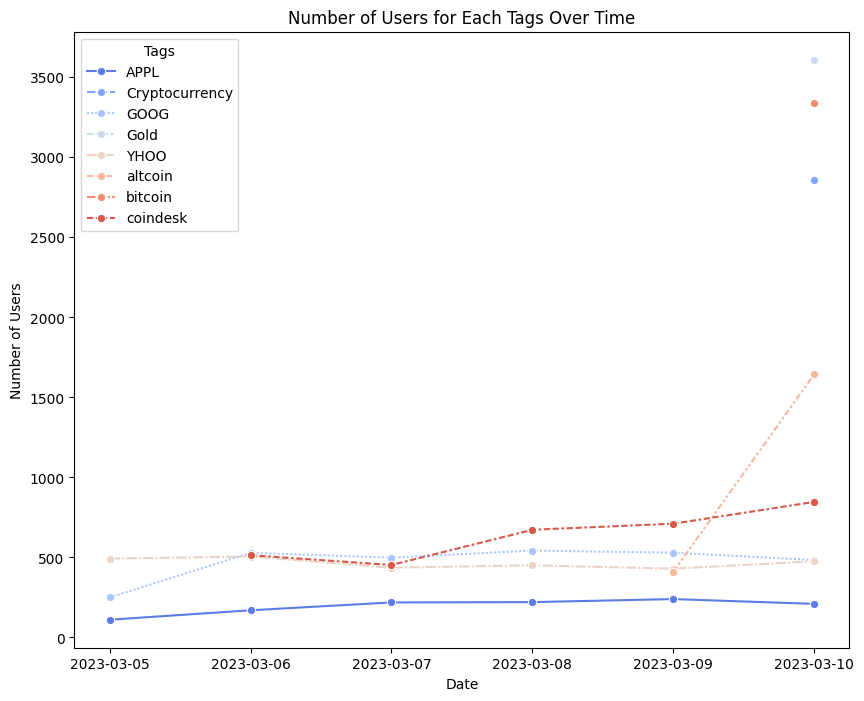

In [25]:
# Group by 'date' and 'tag', and count the unique number of users
data_counts = df.groupby(['date_only', 'tag'])['User'].nunique().unstack()

plt.figure(figsize = (10,8))
sns.lineplot(data_counts, marker = 'o',palette = 'coolwarm')

#labels and title
plt.title('Number of Users for Each Tags Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend(title='Tags')

plt.show()

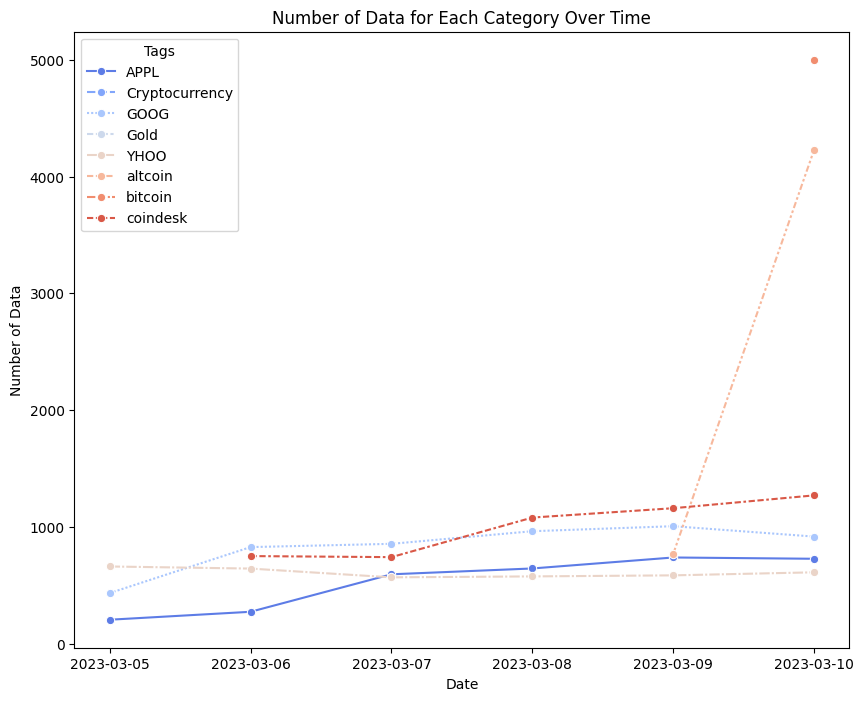

In [26]:
# Group by 'date' and 'tag', and count the unique number of tweets
data_counts = df.groupby(['date_only', 'tag'])['Tweet Id'].nunique().unstack()

plt.figure(figsize = (10,8))
sns.lineplot(data_counts, marker = 'o', palette = 'coolwarm')

# labels and title
plt.title('Number of Data for Each Category Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Data')
plt.legend(title='Tags')

plt.show()